In [1]:
#pip install plotly

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import string
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from wordcloud import WordCloud,STOPWORDS

plt.rc('figure',figsize=(17,13))
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as pyo
from plotly.subplots import make_subplots

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Kanagavel\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
#pip install vaderSentiment

In [4]:
#pip install twython

In [2]:
df = pd.read_csv("Tweet_2020_cleaned_data.csv")

In [3]:
df

,Unnamed: 0.1,Unnamed: 0,Date,User,Tweet,Language,Hashtags,In_reply,Likes,Retweets,Replies,Tweet_punc,Tweet_stop,Tweet_tokenized,Tweet_lemmatized
0,0,0,2020-04-15 23:50:02+00:00,BattleBornProg,trump gave johnson &amp; johnson $2.5 billion ...,en,['COVIDvaccine'],NaN,1,0,0,trump gave johnson amp johnson 25 billion in t...,trump gave johnson amp johnson 25 billion tax ...,"['trump', 'gave', 'johnson', 'amp', 'johnson',...","['trump', 'gave', 'johnson', 'amp', 'johnson',..."
1,1,1,2020-04-15 23:44:16+00:00,Dang_Atoll,@dg37941043 @realcandaceo @billgates @who seve...,en,NaN,NaN,0,0,0,dg37941043 realcandaceo billgates who seven se...,dg37941043 realcandaceo billgates seven senega...,"['dg37941043', 'realcandaceo', 'billgates', 's...","['dg37941043', 'realcandaceo', 'billgates', 's..."
2,2,2,2020-04-15 23:43:12+00:00,realkimstover,have you ever heard the expression “sipping fr...,en,NaN,NaN,9,0,5,have you ever heard the expression sipping fro...,ever heard expression sipping frostys hell pas...,"['ever', 'heard', 'expression', 'sipping', 'fr...","['ever', 'heard', 'expression', 'sipping', 'fr..."
3,3,3,2020-04-15 23:23:23+00:00,GmoneyTrader,@davie1903 @rectitude20 i coukd not agree with...,en,NaN,https://twitter.com/coddlelover,1,1,0,davie1903 rectitude20 i coukd not agree with y...,davie1903 rectitude20 coukd agree planet going...,"['davie1903', 'rectitude20', 'coukd', 'agree',...","['davie1903', 'rectitude20', 'coukd', 'agree',..."
4,4,4,2020-04-15 23:16:28+00:00,msmaddwood,my brain is just an endless loop of the peaky ...,en,NaN,NaN,2,0,0,my brain is just an endless loop of the peaky ...,brain endless loop peaky blinders theme song s...,"['brain', 'endless', 'loop', 'peaky', 'blinder...","['brain', 'endless', 'loop', 'peaky', 'blinder..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255578,269267,99996,2020-12-19 14:27:32+00:00,Dan_Abazia,ready to begin the next front in the battle ag...,en,"['covid19', 'Moderna', 'covidvaccine']",NaN,1,0,0,ready to begin the next front in the battle ag...,ready begin next front battle covid19 moderna ...,"['ready', 'begin', 'next', 'front', 'battle', ...","['ready', 'begin', 'next', 'front', 'battle', ..."
255579,269268,99997,2020-12-19 14:27:15+00:00,brobert545,to all you liberal mothers who don’t vaccinate...,en,NaN,NaN,9,3,5,to all you liberal mothers who dont vaccinate ...,liberal mothers dont vaccinate kids autism thr...,"['liberal', 'mothers', 'dont', 'vaccinate', 'k...","['liberal', 'mother', 'dont', 'vaccinate', 'ki..."
255580,269269,99998,2020-12-19 14:27:09+00:00,corypcoffey,check out current @osu_pharmacy pgy1 #ambcarer...,en,"['AmbCareRx', 'TwitteRx', 'PharmRes', 'CovidVa...",NaN,27,4,0,check out current osu_pharmacy pgy1 ambcarerx ...,check current osu_pharmacy pgy1 ambcarerx resi...,"['check', 'current', 'osu_pharmacy', 'pgy1', '...","['check', 'current', 'osu_pharmacy', 'pgy1', '..."
255581,269270,99999,2020-12-19 14:26:59+00:00,jcosgrove21,this is a really great thread if you want a be...,en,NaN,NaN,1,0,0,this is a really great thread if you want a be...,really great thread want better understanding ...,"['really', 'great', 'thread', 'want', 'better'...","['really', 'great', 'thread', 'want', 'better'..."


In [4]:
df['Tweet_lemmatized'] = df['Tweet_lemmatized'].str.replace('[^\w\s]','')

C:\Users\Kanagavel\AppData\Local\Temp\ipykernel_21336\1124987968.py:1: FutureWarning:

The default value of regex will change from True to False in a future version.



In [5]:
df

,Unnamed: 0.1,Unnamed: 0,Date,User,Tweet,Language,Hashtags,In_reply,Likes,Retweets,Replies,Tweet_punc,Tweet_stop,Tweet_tokenized,Tweet_lemmatized
0,0,0,2020-04-15 23:50:02+00:00,BattleBornProg,trump gave johnson &amp; johnson $2.5 billion ...,en,['COVIDvaccine'],NaN,1,0,0,trump gave johnson amp johnson 25 billion in t...,trump gave johnson amp johnson 25 billion tax ...,"['trump', 'gave', 'johnson', 'amp', 'johnson',...",trump gave johnson amp johnson 25 billion tax ...
1,1,1,2020-04-15 23:44:16+00:00,Dang_Atoll,@dg37941043 @realcandaceo @billgates @who seve...,en,NaN,NaN,0,0,0,dg37941043 realcandaceo billgates who seven se...,dg37941043 realcandaceo billgates seven senega...,"['dg37941043', 'realcandaceo', 'billgates', 's...",dg37941043 realcandaceo billgates seven senega...
2,2,2,2020-04-15 23:43:12+00:00,realkimstover,have you ever heard the expression “sipping fr...,en,NaN,NaN,9,0,5,have you ever heard the expression sipping fro...,ever heard expression sipping frostys hell pas...,"['ever', 'heard', 'expression', 'sipping', 'fr...",ever heard expression sipping frostys hell pas...
3,3,3,2020-04-15 23:23:23+00:00,GmoneyTrader,@davie1903 @rectitude20 i coukd not agree with...,en,NaN,https://twitter.com/coddlelover,1,1,0,davie1903 rectitude20 i coukd not agree with y...,davie1903 rectitude20 coukd agree planet going...,"['davie1903', 'rectitude20', 'coukd', 'agree',...",davie1903 rectitude20 coukd agree planet going...
4,4,4,2020-04-15 23:16:28+00:00,msmaddwood,my brain is just an endless loop of the peaky ...,en,NaN,NaN,2,0,0,my brain is just an endless loop of the peaky ...,brain endless loop peaky blinders theme song s...,"['brain', 'endless', 'loop', 'peaky', 'blinder...",brain endless loop peaky blinder theme song so...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255578,269267,99996,2020-12-19 14:27:32+00:00,Dan_Abazia,ready to begin the next front in the battle ag...,en,"['covid19', 'Moderna', 'covidvaccine']",NaN,1,0,0,ready to begin the next front in the battle ag...,ready begin next front battle covid19 moderna ...,"['ready', 'begin', 'next', 'front', 'battle', ...",ready begin next front battle covid19 moderna ...
255579,269268,99997,2020-12-19 14:27:15+00:00,brobert545,to all you liberal mothers who don’t vaccinate...,en,NaN,NaN,9,3,5,to all you liberal mothers who dont vaccinate ...,liberal mothers dont vaccinate kids autism thr...,"['liberal', 'mothers', 'dont', 'vaccinate', 'k...",liberal mother dont vaccinate kid autism threa...
255580,269269,99998,2020-12-19 14:27:09+00:00,corypcoffey,check out current @osu_pharmacy pgy1 #ambcarer...,en,"['AmbCareRx', 'TwitteRx', 'PharmRes', 'CovidVa...",NaN,27,4,0,check out current osu_pharmacy pgy1 ambcarerx ...,check current osu_pharmacy pgy1 ambcarerx resi...,"['check', 'current', 'osu_pharmacy', 'pgy1', '...",check current osu_pharmacy pgy1 ambcarerx resi...
255581,269270,99999,2020-12-19 14:26:59+00:00,jcosgrove21,this is a really great thread if you want a be...,en,NaN,NaN,1,0,0,this is a really great thread if you want a be...,really great thread want better understanding ...,"['really', 'great', 'thread', 'want', 'better'...",really great thread want better understanding ...


In [6]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
new_words = {
    'cpos': -3.0,
    'cneg': 3.0,
}
analyser = SentimentIntensityAnalyzer()
analyser.lexicon.update(new_words)
scores=[]
for i in range(len(df['Tweet_lemmatized'])):
    
    score = analyser.polarity_scores(df['Tweet_lemmatized'][i])
    score=score['compound']
    scores.append(score)
sentiment=[]
for i in scores:
    if i>=0.75:
        sentiment.append('Overly Positive')
    elif (i>=0.05) and (i<0.75):
        sentiment.append('Positive')
    elif i<=(-0.75):
        sentiment.append('Overly Negative')
    elif (i<=-0.05) and (i>-0.75):
        sentiment.append('Negative')
    else:
        sentiment.append('Neutral')
df['sentiment']= pd.Series(np.array(sentiment))

In [7]:
df['score']= pd.Series(np.array(scores))

In [8]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Date,User,Tweet,Language,Hashtags,In_reply,Likes,Retweets,Replies,Tweet_punc,Tweet_stop,Tweet_tokenized,Tweet_lemmatized,sentiment,score
0,0,0,2020-04-15 23:50:02+00:00,BattleBornProg,trump gave johnson &amp; johnson $2.5 billion ...,en,['COVIDvaccine'],NaN,1,0,0,trump gave johnson amp johnson 25 billion in t...,trump gave johnson amp johnson 25 billion tax ...,"['trump', 'gave', 'johnson', 'amp', 'johnson',...",trump gave johnson amp johnson 25 billion tax ...,Negative,-0.1511
1,1,1,2020-04-15 23:44:16+00:00,Dang_Atoll,@dg37941043 @realcandaceo @billgates @who seve...,en,NaN,NaN,0,0,0,dg37941043 realcandaceo billgates who seven se...,dg37941043 realcandaceo billgates seven senega...,"['dg37941043', 'realcandaceo', 'billgates', 's...",dg37941043 realcandaceo billgates seven senega...,Negative,-0.5574
2,2,2,2020-04-15 23:43:12+00:00,realkimstover,have you ever heard the expression “sipping fr...,en,NaN,NaN,9,0,5,have you ever heard the expression sipping fro...,ever heard expression sipping frostys hell pas...,"['ever', 'heard', 'expression', 'sipping', 'fr...",ever heard expression sipping frostys hell pas...,Negative,-0.6808
3,3,3,2020-04-15 23:23:23+00:00,GmoneyTrader,@davie1903 @rectitude20 i coukd not agree with...,en,NaN,https://twitter.com/coddlelover,1,1,0,davie1903 rectitude20 i coukd not agree with y...,davie1903 rectitude20 coukd agree planet going...,"['davie1903', 'rectitude20', 'coukd', 'agree',...",davie1903 rectitude20 coukd agree planet going...,Positive,0.3182
4,4,4,2020-04-15 23:16:28+00:00,msmaddwood,my brain is just an endless loop of the peaky ...,en,NaN,NaN,2,0,0,my brain is just an endless loop of the peaky ...,brain endless loop peaky blinders theme song s...,"['brain', 'endless', 'loop', 'peaky', 'blinder...",brain endless loop peaky blinder theme song so...,Positive,0.3182


In [9]:
df.shape

(255583, 17)

In [11]:
df.drop(columns=['In_reply','Likes','Retweets','Replies'])

,Unnamed: 0.1,Unnamed: 0,Date,User,Tweet,Language,Hashtags,Tweet_punc,Tweet_stop,Tweet_tokenized,Tweet_lemmatized,sentiment,score
0,0,0,2020-04-15 23:50:02+00:00,BattleBornProg,trump gave johnson &amp; johnson $2.5 billion ...,en,['COVIDvaccine'],trump gave johnson amp johnson 25 billion in t...,trump gave johnson amp johnson 25 billion tax ...,"['trump', 'gave', 'johnson', 'amp', 'johnson',...",trump gave johnson amp johnson 25 billion tax ...,Negative,-0.1511
1,1,1,2020-04-15 23:44:16+00:00,Dang_Atoll,@dg37941043 @realcandaceo @billgates @who seve...,en,NaN,dg37941043 realcandaceo billgates who seven se...,dg37941043 realcandaceo billgates seven senega...,"['dg37941043', 'realcandaceo', 'billgates', 's...",dg37941043 realcandaceo billgates seven senega...,Negative,-0.5574
2,2,2,2020-04-15 23:43:12+00:00,realkimstover,have you ever heard the expression “sipping fr...,en,NaN,have you ever heard the expression sipping fro...,ever heard expression sipping frostys hell pas...,"['ever', 'heard', 'expression', 'sipping', 'fr...",ever heard expression sipping frostys hell pas...,Negative,-0.6808
3,3,3,2020-04-15 23:23:23+00:00,GmoneyTrader,@davie1903 @rectitude20 i coukd not agree with...,en,NaN,davie1903 rectitude20 i coukd not agree with y...,davie1903 rectitude20 coukd agree planet going...,"['davie1903', 'rectitude20', 'coukd', 'agree',...",davie1903 rectitude20 coukd agree planet going...,Positive,0.3182
4,4,4,2020-04-15 23:16:28+00:00,msmaddwood,my brain is just an endless loop of the peaky ...,en,NaN,my brain is just an endless loop of the peaky ...,brain endless loop peaky blinders theme song s...,"['brain', 'endless', 'loop', 'peaky', 'blinder...",brain endless loop peaky blinder theme song so...,Positive,0.3182
...,...,...,...,...,...,...,...,...,...,...,...,...,...
255578,269267,99996,2020-12-19 14:27:32+00:00,Dan_Abazia,ready to begin the next front in the battle ag...,en,"['covid19', 'Moderna', 'covidvaccine']",ready to begin the next front in the battle ag...,ready begin next front battle covid19 moderna ...,"['ready', 'begin', 'next', 'front', 'battle', ...",ready begin next front battle covid19 moderna ...,Neutral,-0.0258
255579,269268,99997,2020-12-19 14:27:15+00:00,brobert545,to all you liberal mothers who don’t vaccinate...,en,NaN,to all you liberal mothers who dont vaccinate ...,liberal mothers dont vaccinate kids autism thr...,"['liberal', 'mothers', 'dont', 'vaccinate', 'k...",liberal mother dont vaccinate kid autism threa...,Negative,-0.5267
255580,269269,99998,2020-12-19 14:27:09+00:00,corypcoffey,check out current @osu_pharmacy pgy1 #ambcarer...,en,"['AmbCareRx', 'TwitteRx', 'PharmRes', 'CovidVa...",check out current osu_pharmacy pgy1 ambcarerx ...,check current osu_pharmacy pgy1 ambcarerx resi...,"['check', 'current', 'osu_pharmacy', 'pgy1', '...",check current osu_pharmacy pgy1 ambcarerx resi...,Positive,0.4404
255581,269270,99999,2020-12-19 14:26:59+00:00,jcosgrove21,this is a really great thread if you want a be...,en,NaN,this is a really great thread if you want a be...,really great thread want better understanding ...,"['really', 'great', 'thread', 'want', 'better'...",really great thread want better understanding ...,Overly Positive,0.8341


In [12]:
df.groupby(by="sentiment").mean()

,Unnamed: 0.1,Unnamed: 0,Likes,Retweets,Replies,score
sentiment,,,,,,
Negative,135896.653174,39009.809433,23.633817,3.831176,1.381946,-0.390501
Neutral,134144.836846,38681.011849,15.566986,2.471966,1.139510,0.000076
Overly Negative,132697.072672,38325.459254,12.416053,3.110962,1.244139,-0.835589
Overly Positive,134153.274277,37882.639303,15.944813,2.317625,2.059195,0.836814
Positive,134423.356291,39496.740193,15.277348,2.638077,1.177565,0.424043


In [13]:
temp = df.groupby('sentiment').count()['Tweet_lemmatized'].reset_index().sort_values(by='Tweet_lemmatized',ascending=False)
temp.style.background_gradient(cmap='Purples')

,sentiment,Tweet_lemmatized
4,Positive,93042
1,Neutral,74016
0,Negative,57859
3,Overly Positive,21708
2,Overly Negative,8958


<AxesSubplot:xlabel='sentiment', ylabel='count'>

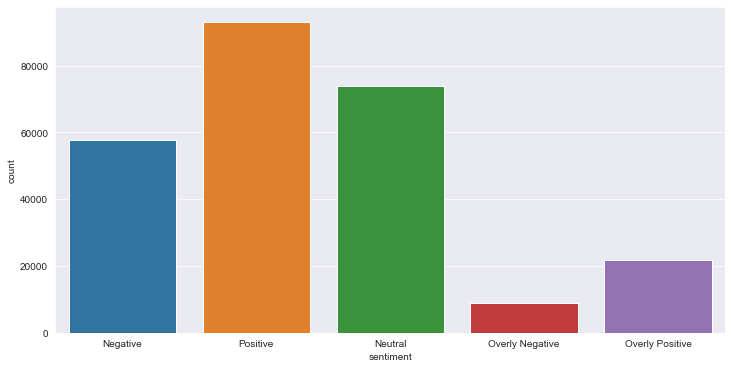

In [17]:
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=df)